# SMA strategy backtest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [ ]:
# Download the data
start = '2020-01-01'
end = '2025-05-01'

btc = yf.download(tickers='BTC-USD', start=start, end=end)
btc.columns = ['close', 'high', 'low', 'open', 'volumne']
print(btc.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

                  close         high          low         open      volumne
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [5]:
# set up the dataset
df = pd.DataFrame(btc['close'].copy())

# compute the log returns
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# compute the sma
df['sma24'] = df['close'].rolling(24).mean()
df['sma50'] = df['close'].rolling(50).mean()
print(df.tail())

                   close  log_returns         sma24         sma50
Date                                                             
2025-04-26  94646.929688    -0.000777  85356.286458  84653.300937
2025-04-27  93754.843750    -0.009470  85800.120443  84805.305938
2025-04-28  94978.750000     0.012970  86264.076497  85092.860156
2025-04-29  94284.789062    -0.007333  86713.242839  85407.915938
2025-04-30  94207.312500    -0.000822  87379.610677  85634.817969


/var/folders/9z/mvzm9dhd5c3dzy6mdkxzhf_c0000gn/T/ipykernel_2795/1458816992.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


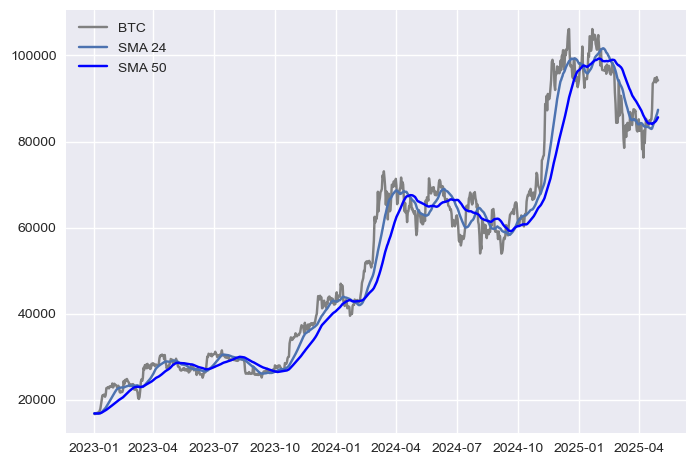

In [6]:
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1)
ax.plot(df['close'][df.index > '2023-01-01'], c='gray', label='BTC')
ax.plot(df['sma24'][df.index > '2023-01-01'], label='SMA 24')
ax.plot(df['sma50'][df.index > '2023-01-01'], c='blue', label='SMA 50')
ax.legend()

In [7]:
# create the orders

df['position'] = np.where(df['sma24'] > df['sma50'], 1, -1)
print(df.tail())

                   close  log_returns         sma24         sma50  position
Date                                                                       
2025-04-26  94646.929688    -0.000777  85356.286458  84653.300937         1
2025-04-27  93754.843750    -0.009470  85800.120443  84805.305938         1
2025-04-28  94978.750000     0.012970  86264.076497  85092.860156         1
2025-04-29  94284.789062    -0.007333  86713.242839  85407.915938         1
2025-04-30  94207.312500    -0.000822  87379.610677  85634.817969         1


Text(0.5, 1.0, 'Order status')

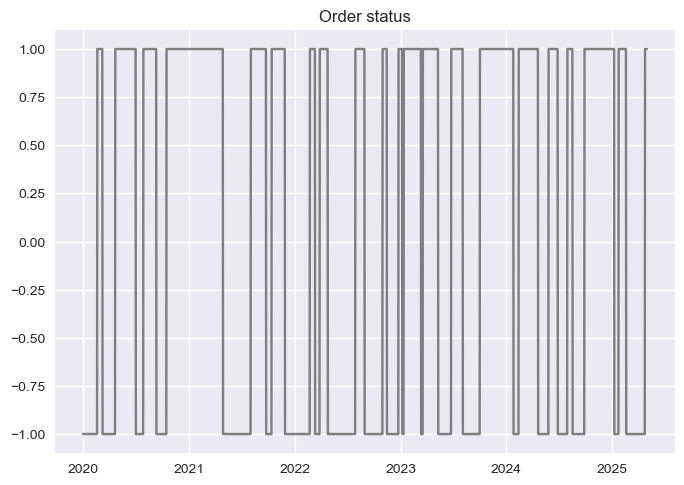

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['position'], c='gray')
ax.set_title('Order status')

In [9]:
# we can now look at the returns of the buy-and-hold and the strategy

df['strategy'] = df['position'].shift(1) * df['log_returns']
df[['log_returns', 'strategy']].sum().apply(np.exp)

log_returns    13.084032
strategy        5.353682
dtype: float64

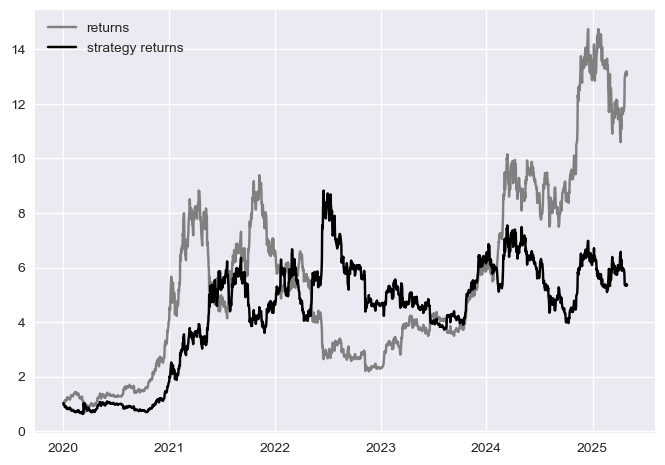

In [ ]:
# let's plot the evolution of the returns
fig, ax = plt.subplots(1, 1)
ax.plot(df['log_returns'].cumsum().apply(np.exp), label='returns', c='gray')
ax.plot(df['strategy'].cumsum().apply(np.exp), label='strategy returns', c='black')
ax.legend()

In [11]:
# cumulative returns and cumulative return max

df['cumret'] = df['strategy'].cumsum().apply(np.exp)
df['cumret_max'] = df['cumret'].cummax()

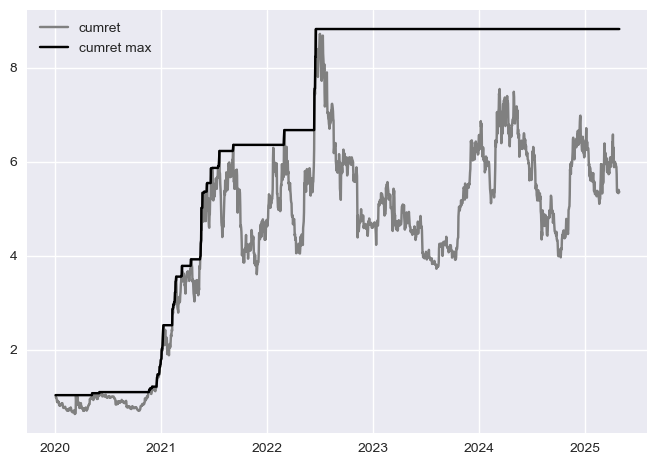

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['cumret'], c='gray', label='cumret')
ax.plot(df['cumret_max'], c='black', label='cumret max')
ax.legend()

In [14]:
# calculate the maximum drawdown

drawdown = df['cumret_max'] - df['cumret']
drawdown.max()

5.100400273490388

In [15]:
# calculate the longuest drawdown period

temp = drawdown[drawdown == 0]
period = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
period.max()

datetime.timedelta(days=175)